In [22]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is very similar to c5e1_mnist_learning but the network is modified to use ReLU neurons in the hidden layer, softmax in the output layer, categorical crossentropy as loss function, Adam as optimizer, and a mini-batch size of 64. More context for this code example can be found in the section "Experiment: Tweaking Network and Learning Parameters" in Chapter 5 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 20
BATCH_SIZE_1 = 1
BATCH_SIZE_64 = 64

In [24]:
# Load training and test datasets.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

# One-hot encode labels.
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [25]:
# Create a Sequential model. Call it Conf1
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# tanh as activation function for hidden layer and
# Uniform 0.1 initializer.
# Sigmoid as activation function for output layer
# and Uniform 0.1 uniform initializer.
# Object used to initialize weights.
initializer = keras.initializers.RandomUniform(
    minval=-0.1, maxval=0.1)

# conf1 = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(25, activation='tanh',
#                        kernel_initializer=initializer,
#                        bias_initializer='zeros'),
#     keras.layers.Dense(10, activation='sigmoid',
#                        kernel_initializer=initializer,
#                        bias_initializer='zeros')])

conf1 = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])

# Use stochastic gradient descent (SGD) with
# learning rate of 0.01 and no other bells and whistles.
# MSE as loss function and report accuracy during training.
opt = keras.optimizers.SGD(learning_rate=0.01)

conf1.compile(loss='mean_squared_error', optimizer = opt,
              metrics =['accuracy'])

# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 1 examples (batch_size=1)..
history1 = conf1.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE_1,
                    verbose=2, shuffle=True)

Epoch 1/20
60000/60000 - 105s - 2ms/step - accuracy: 0.6285 - loss: 0.0567 - val_accuracy: 0.8717 - val_loss: 0.0307
Epoch 2/20
60000/60000 - 94s - 2ms/step - accuracy: 0.8924 - loss: 0.0234 - val_accuracy: 0.9081 - val_loss: 0.0183
Epoch 3/20
60000/60000 - 98s - 2ms/step - accuracy: 0.9109 - loss: 0.0172 - val_accuracy: 0.9181 - val_loss: 0.0154
Epoch 4/20
60000/60000 - 126s - 2ms/step - accuracy: 0.9195 - loss: 0.0150 - val_accuracy: 0.9241 - val_loss: 0.0140
Epoch 5/20
60000/60000 - 269s - 4ms/step - accuracy: 0.9249 - loss: 0.0137 - val_accuracy: 0.9281 - val_loss: 0.0130
Epoch 6/20
60000/60000 - 122s - 2ms/step - accuracy: 0.9289 - loss: 0.0128 - val_accuracy: 0.9306 - val_loss: 0.0126
Epoch 7/20
60000/60000 - 117s - 2ms/step - accuracy: 0.9322 - loss: 0.0122 - val_accuracy: 0.9322 - val_loss: 0.0121
Epoch 8/20
60000/60000 - 202s - 3ms/step - accuracy: 0.9340 - loss: 0.0117 - val_accuracy: 0.9333 - val_loss: 0.0117
Epoch 9/20
60000/60000 - 146s - 2ms/step - accuracy: 0.9362 - loss

In [26]:
# Create a Sequential model. Call it Conf2
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# tanh as activation function for hidden layer and
# Uniform 0.1 initializer.
# Sigmoid as activation function for output layer
# and Uniform 0.1 uniform initializer.
# Object used to initialize weights.
initializer = keras.initializers.RandomUniform(
    minval=-0.1, maxval=0.1)

conf2 = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])

# Use stochastic gradient descent (SGD) with
# learning rate of 10.0 and no other bells and whistles.
# MSE as loss function and report accuracy during training.
opt = keras.optimizers.SGD(learning_rate=10.0)

conf2.compile(loss='mean_squared_error', optimizer = opt,
              metrics =['accuracy'])

# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 1 examples (batch_size=1).
history2 = conf2.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE_1,
                    verbose=2, shuffle=True)

Epoch 1/20
60000/60000 - 109s - 2ms/step - accuracy: 0.2910 - loss: 0.0913 - val_accuracy: 0.3196 - val_loss: 0.0981
Epoch 2/20
60000/60000 - 110s - 2ms/step - accuracy: 0.2736 - loss: 0.0910 - val_accuracy: 0.2562 - val_loss: 0.0870
Epoch 3/20
60000/60000 - 136s - 2ms/step - accuracy: 0.2833 - loss: 0.0925 - val_accuracy: 0.3473 - val_loss: 0.0957
Epoch 4/20
60000/60000 - 101s - 2ms/step - accuracy: 0.3410 - loss: 0.0952 - val_accuracy: 0.3660 - val_loss: 0.0931
Epoch 5/20
60000/60000 - 101s - 2ms/step - accuracy: 0.2691 - loss: 0.0943 - val_accuracy: 0.2521 - val_loss: 0.0941
Epoch 6/20
60000/60000 - 100s - 2ms/step - accuracy: 0.2117 - loss: 0.0981 - val_accuracy: 0.1509 - val_loss: 0.1000
Epoch 7/20
60000/60000 - 118s - 2ms/step - accuracy: 0.2044 - loss: 0.0984 - val_accuracy: 0.2863 - val_loss: 0.0931
Epoch 8/20
60000/60000 - 198s - 3ms/step - accuracy: 0.2561 - loss: 0.0924 - val_accuracy: 0.2697 - val_loss: 0.0918
Epoch 9/20
60000/60000 - 156s - 3ms/step - accuracy: 0.2646 - lo

In [27]:
# Create a Sequential model. Call it Conf3
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# tanh as activation function for hidden layer and
# Glorat normal initializer.
# Sigmoid as activation function for output layer
# and Glorot uniform initializer.
conf3 = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use Adam optimizer with default parameters.
# MSE as loss function and
# report accuracy during training.
conf3.compile(loss='mean_squared_error',
              optimizer = 'adam',
              metrics =['accuracy'])

# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 1 examples (batch_size=1).
history3 = conf3.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE_1,
                    verbose=2, shuffle=True)

Epoch 1/20
60000/60000 - 136s - 2ms/step - accuracy: 0.8822 - loss: 0.0198 - val_accuracy: 0.9062 - val_loss: 0.0151
Epoch 2/20
60000/60000 - 133s - 2ms/step - accuracy: 0.9067 - loss: 0.0148 - val_accuracy: 0.9141 - val_loss: 0.0137
Epoch 3/20
60000/60000 - 148s - 2ms/step - accuracy: 0.9124 - loss: 0.0139 - val_accuracy: 0.9246 - val_loss: 0.0123
Epoch 4/20
60000/60000 - 178s - 3ms/step - accuracy: 0.9180 - loss: 0.0131 - val_accuracy: 0.9239 - val_loss: 0.0121
Epoch 5/20
60000/60000 - 207s - 3ms/step - accuracy: 0.9197 - loss: 0.0128 - val_accuracy: 0.9234 - val_loss: 0.0126
Epoch 6/20
60000/60000 - 172s - 3ms/step - accuracy: 0.9235 - loss: 0.0122 - val_accuracy: 0.9276 - val_loss: 0.0117
Epoch 7/20
60000/60000 - 185s - 3ms/step - accuracy: 0.9255 - loss: 0.0118 - val_accuracy: 0.9287 - val_loss: 0.0117
Epoch 8/20
60000/60000 - 178s - 3ms/step - accuracy: 0.9252 - loss: 0.0119 - val_accuracy: 0.9263 - val_loss: 0.0120
Epoch 9/20
60000/60000 - 180s - 3ms/step - accuracy: 0.9269 - lo

In [28]:
# Create a Sequential model. Call it Conf4
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# relu as activation function for hidden layer and
# He normal initializer.
# Softmax as activation function for output layer
# and Glorot uniform initializer.
conf4 = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='relu',
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use Adam optimizer with default parameters.
# Categorical cross-entropy as loss function and
# report accuracy during training.
conf4.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 1 examples (batch_size=1).
history4 = conf4.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE_1,
                    verbose=2, shuffle=True)


Epoch 1/20
60000/60000 - 95s - 2ms/step - accuracy: 0.9064 - loss: 0.3265 - val_accuracy: 0.9319 - val_loss: 0.2398
Epoch 2/20
60000/60000 - 93s - 2ms/step - accuracy: 0.9309 - loss: 0.2487 - val_accuracy: 0.9331 - val_loss: 0.2361
Epoch 3/20
60000/60000 - 93s - 2ms/step - accuracy: 0.9382 - loss: 0.2270 - val_accuracy: 0.9370 - val_loss: 0.2387
Epoch 4/20
60000/60000 - 97s - 2ms/step - accuracy: 0.9414 - loss: 0.2162 - val_accuracy: 0.9450 - val_loss: 0.2116
Epoch 5/20
60000/60000 - 139s - 2ms/step - accuracy: 0.9431 - loss: 0.2128 - val_accuracy: 0.9343 - val_loss: 0.2478
Epoch 6/20
60000/60000 - 157s - 3ms/step - accuracy: 0.9454 - loss: 0.2051 - val_accuracy: 0.9471 - val_loss: 0.2169
Epoch 7/20
60000/60000 - 188s - 3ms/step - accuracy: 0.9465 - loss: 0.2021 - val_accuracy: 0.9336 - val_loss: 0.2753
Epoch 8/20
60000/60000 - 162s - 3ms/step - accuracy: 0.9475 - loss: 0.1989 - val_accuracy: 0.9447 - val_loss: 0.2282
Epoch 9/20
60000/60000 - 146s - 2ms/step - accuracy: 0.9487 - loss: 

In [29]:
# Create a Sequential model.
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# relu as activation function for hidden layer and
# He normal initializer.
# Softmax as activation function for output layer
# and Glorot uniform initializer.
conf5 = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='relu',
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use Adam optimizer with default parameters.
# Categorical cross-entropy as loss function and
# report accuracy during training.
conf5.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after 64 examples (batch_size=64).
history5 = conf5.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE_64,
                    verbose=2, shuffle=True)


Epoch 1/20
938/938 - 5s - 6ms/step - accuracy: 0.8858 - loss: 0.3799 - val_accuracy: 0.9320 - val_loss: 0.2308
Epoch 2/20
938/938 - 2s - 3ms/step - accuracy: 0.9408 - loss: 0.1983 - val_accuracy: 0.9507 - val_loss: 0.1726
Epoch 3/20
938/938 - 2s - 2ms/step - accuracy: 0.9529 - loss: 0.1589 - val_accuracy: 0.9534 - val_loss: 0.1584
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.9597 - loss: 0.1366 - val_accuracy: 0.9580 - val_loss: 0.1448
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.9647 - loss: 0.1214 - val_accuracy: 0.9587 - val_loss: 0.1398
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.9673 - loss: 0.1104 - val_accuracy: 0.9603 - val_loss: 0.1366
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.9684 - loss: 0.1033 - val_accuracy: 0.9617 - val_loss: 0.1279
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.9711 - loss: 0.0962 - val_accuracy: 0.9587 - val_loss: 0.1412
Epoch 9/20
938/938 - 1s - 1ms/step - accuracy: 0.9728 - loss: 0.0891 - val_accuracy: 0.9606 - val_loss: 0.1321
E

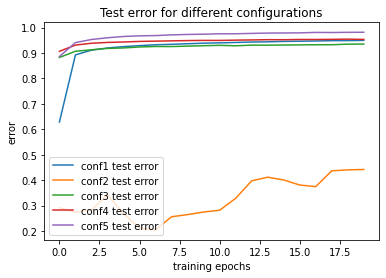

In [30]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.title('Test error for different configurations')
plt.ylabel('error')
plt.xlabel('training epochs')
plt.legend(['conf1 test error','conf2 test error','conf3 test error','conf4 test error','conf5 test error'], loc='lower left')
plt.show()